Рубежный контроль No1 по курсу "Методы машинного обучения"

Выполнил: Полубаров А.Н. Группа ИУ5-21М

Вариант 10

Задача №10.
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

Задача №30.
Для набора данных проведите удаление повторяющихся признаков.

Дополнительные требования по группам:

Для студентов групп ИУ5-21М, ИУ5И-21М - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing
import matplotlib.pyplot as plt

# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [1]:
!wget https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv

--2022-06-12 05:45:25--  https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44028 (43K) [text/plain]
Saving to: ‘pokemon.csv’

pokemon.csv         100%[===================>]  43.00K  --.-KB/s    in 0.002s  

2022-06-12 05:45:25 (24.3 MB/s) - ‘pokemon.csv’ saved [44028/44028]



In [3]:
data = pd.read_csv('pokemon.csv', sep=",")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Задача 10

In [4]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [32]:
#Заполнение самым частым
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent")
data["Type 2"] = freq_imp.fit_transform(data[["Type 2"]])

In [33]:
data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Задача 30

In [42]:
data['Name2'] = data['Name']
data['Legendary2'] = data['Legendary']
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name2,Legendary2
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Ivysaur,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Venusaur,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,VenusaurMega Venusaur,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False,Charmander,False


In [44]:
data.T.drop_duplicates().T.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False


Доп. задание

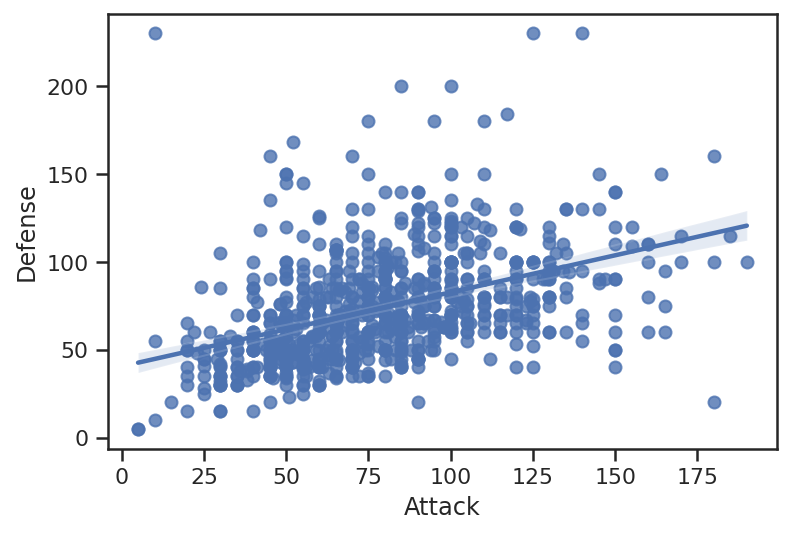

In [35]:
sns.regplot(x=data["Attack"], y=data["Defense"])